In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# importing datasets
price=pd.read_csv('Cleaned_dataset.csv')
delay1=pd.read_csv('Final.csv')
delay2=pd.read_csv('Delay.csv')


In [3]:
price

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [4]:
delay1

,Date,Departure Airport Rating (out of 10),Departure Airport On Time Rating (out of 10),Departure Airport Service Rating (out of 10),Arrival Airport Rating (out of 10),Arrival Airport On Time Rating (out of 10),Arrival Airport Service Rating (out of 10),Airplane Type,Expected Departure Time,Departure Time,...,A_cloudcover,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,route
0,15-04-2019,7.50,8.6,9.2,7.29,6.2,9.0,A320,05:31,05:39,...,34,62,0.0,1009,30,10,77,2,6,BLR-BOM
1,16-04-2019,7.50,8.6,9.2,7.29,6.2,9.0,A320,05:31,05:34,...,6,74,0.0,1009,30,10,197,6,6,BLR-BOM
2,17-04-2019,7.50,8.6,9.2,7.29,6.2,9.0,A320,05:31,05:33,...,5,64,0.0,1012,29,10,345,15,7,BLR-BOM
3,18-04-2019,7.50,8.6,9.2,7.29,6.2,9.0,A320,05:31,05:34,...,3,69,0.0,1012,28,10,240,12,6,BLR-BOM
4,19-04-2019,7.50,8.6,9.2,7.29,6.2,9.0,A320,05:31,05:46,...,0,66,0.0,1010,31,10,45,10,7,BLR-BOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,23-01-2020,7.99,7.3,9.1,8.27,7.8,9.0,A320,07:05,07:32,...,0,58,0.0,1017,24,10,112,12,9,DEL-HYD
14948,24-01-2020,7.99,7.3,9.1,8.27,7.8,9.0,A320,07:05,07:22,...,2,48,0.0,1016,26,10,85,9,9,DEL-HYD
14949,25-01-2020,7.99,7.3,9.1,8.27,7.8,9.0,A320,07:05,07:08,...,3,51,0.0,1015,25,10,108,8,8,DEL-HYD
14950,26-01-2020,7.99,7.3,9.1,8.27,7.8,9.0,A320,07:05,07:30,...,0,0,0.0,0,0,0,0,0,0,DEL-HYD


In [5]:
delay2

,Date,Departure Airport,Departure Airport Rating (out of 10),Departure Airport On Time Rating (out of 10),Departure Airport Service Rating (out of 10),Arrival Airport,Arrival Airport Rating (out of 10),Arrival Airport On Time Rating (out of 10),Arrival Airport Service Rating (out of 10),Airplane Type,...,Departure Delay,Duration,Expected Arrival Time,Arrival Time,Arrival Time Delay,Carrier,Carrier Rating (out of 10),Carrier Market Share (out of 100),Carrier Load Factor (out of 100),Carrier On Time Performance Rating (out of 100)
0,28-1-18,BLR,NaN,NaN,NaN,DEL,7.99,7.3,9.1,NaN,...,0:00:00,2:20,8:55,8:30,-0:25:00,Air India,6.6,12.0,80.75,70.3
1,28-1-18,CCU,NaN,NaN,NaN,DEL,7.99,7.3,9.1,NaN,...,0:01:00,2:09,9:10,9:10,0:00:00,Air India,6.6,12.0,80.75,70.3
2,28-1-18,DEL,7.99,7.3,9.1,HYD,8.27,7.8,9.0,NaN,...,0:28:00,1:46,9:10,9:19,0:09:00,Air India,6.6,12.0,80.75,70.3
3,28-1-18,BOM,7.29,6.2,9.0,DEL,7.99,7.3,9.1,NaN,...,0:07:00,1:40,9:05,8:47,-0:18:00,Air India,6.6,12.0,80.75,70.3
4,28-1-18,BLR,NaN,NaN,NaN,BOM,7.29,6.2,9.0,NaN,...,0:15:00,1:14,8:25,8:14,-0:11:00,Air India,6.6,12.0,80.75,70.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,27-1-20,BLR,NaN,NaN,NaN,BOM,7.29,6.2,9.0,B738,...,0:15:00,1:27,7:10,7:07,-0:03:00,Spicejet,6.8,13.1,93.90,74.7
14948,27-1-20,BLR,NaN,NaN,NaN,DEL,7.99,7.3,9.1,A20N,...,0:15:00,2:23,9:40,9:38,-0:02:00,Vistara,9.2,3.6,81.80,89.0
14949,27-1-20,CCU,NaN,NaN,NaN,DEL,7.99,7.3,9.1,A20N,...,0:10:00,2:15,9:35,9:34,-0:01:00,Vistara,9.2,3.6,81.80,89.0
14950,27-1-20,DEL,7.99,7.3,9.1,HYD,8.27,7.8,9.0,A320,...,0:18:00,0:00,9:25,9:23,-0:02:00,Vistara,9.2,3.6,81.80,89.0


**CODE TO CONVERT A ROW INTO DATETIME FORMAT**

In [6]:
def convert_to_datetime(row):
    parts = row.split(':')
    
    
    hours = int(parts[0])
    minutes = int(parts[1])
    seconds = int(parts[2])
    delta = timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return minutes+hours+(seconds/60)
    
def is_delay(x):
    if x.startswith('-'):
        return x[1:]
    else:
        return x
delay1['Arrival Time Delay']=delay1['Arrival Time Delay'].apply(is_delay)
delay1['Arrival Time Delay']=delay1['Arrival Time Delay'].apply(convert_to_datetime)
dew_df=delay1[['Arrival Time Delay','A_DewPointC']]
# delay2[['Arrival Time Delay','A_DewPointC']]
dew_df


,Arrival Time Delay,A_DewPointC
0,16.0,22
1,20.0,25
2,12.0,21
3,23.0,22
4,11.0,24
...,...,...
14947,2.0,15
14948,20.0,14
14949,26.0,14
14950,2.0,0


**KDE PLOT BETWEEN TIME DELAY AND WEATHER CONDITION**

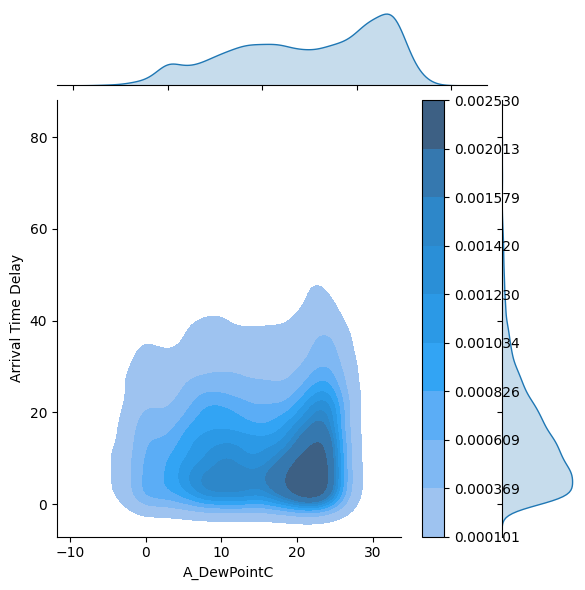

In [7]:
sns.jointplot(data=dew_df,x=dew_df['A_DewPointC'],y=dew_df['Arrival Time Delay'],kind="kde",fill=True,cbar=True)

In [8]:
delay1['Departure Delay']=delay1['Departure Delay'].apply(is_delay)
delay1['Departure Delay']=delay1['Departure Delay'].apply(convert_to_datetime)

**CORRELATION COEFFCIENT  BETWEEN DIFFERENT WEATHER CONDITION AND TIME DELAY**

In [9]:
l1=['D_DewPointC','D_WindGustKmph','D_cloudcover','D_humidity','D_precipMM','D_pressure','D_tempC','D_visibility','D_winddirDegree','D_windspeedKmph']
for i in l1:
    correlation = delay1['Departure Delay'].corr(delay1[i])
    # if correlation>=0.1 o:
    #     print("there seems a relation ",i)
        
    print(correlation, i)

0.03302578117476362 D_DewPointC
0.037624658578990576 D_WindGustKmph
0.0007790532563340327 D_cloudcover
-0.05065152899508875 D_humidity
0.047254624913367835 D_precipMM
-0.019019872987255444 D_pressure
0.06462222158956213 D_tempC
-0.028561705939884028 D_visibility
-0.03034192053281026 D_winddirDegree
0.026235675345359147 D_windspeedKmph


In [10]:
l2=['A_DewPointC','A_WindGustKmph','A_cloudcover','A_humidity','A_precipMM','A_pressure','A_tempC','A_visibility','A_winddirDegree','A_windspeedKmph']
for i in l2:
    correlation = delay1['Departure Delay'].corr(delay1[i])
    # if correlation>=0.1 o:
    #     print("there seems a relation ",i)
        
    print(correlation, i)


-0.07270532200760552 A_DewPointC
-0.03551101259707431 A_WindGustKmph
-0.006592623626184904 A_cloudcover
-0.07931026309603015 A_humidity
-0.028980006752813106 A_precipMM
-0.01902975345664162 A_pressure
0.001029084282188602 A_tempC
0.0006523947418492473 A_visibility
-0.010845962574127068 A_winddirDegree
-0.016490063103726325 A_windspeedKmph


**SHAPIRO TEST**

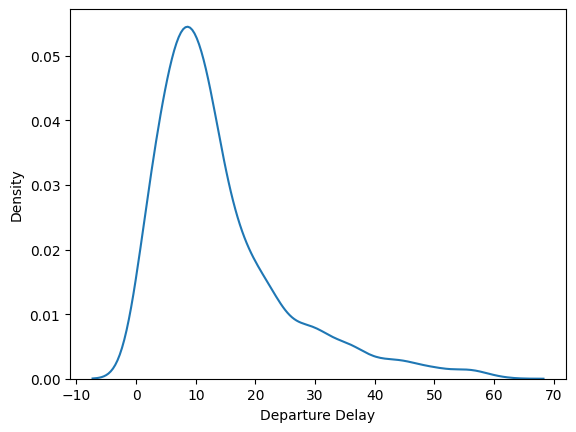

In [11]:
temp_df=delay1[delay1['Carrier']=='Air Asia']['Departure Delay']
sns.kdeplot(data=temp_df)
from scipy import stats
def shapiro_test(dataframe):
    statistic, p_value=stats.shapiro(temp_df)
    print("Shapiro-Wilk Test Statistic:", statistic)
    print("p-value:", p_value)

    # Interpret the results
    alpha = 0.05  # Set your desired significance level
    if p_value > alpha:
        print("Sample appears to be normally distributed (fail to reject H0)")
    else:
        print("Sample does not appear to be normally distributed (reject H0)")


Shapiro-Wilk Test Statistic: 0.8575805425643921
p-value: 2.9248579775844315e-38
Sample does not appear to be normally distributed (reject H0)


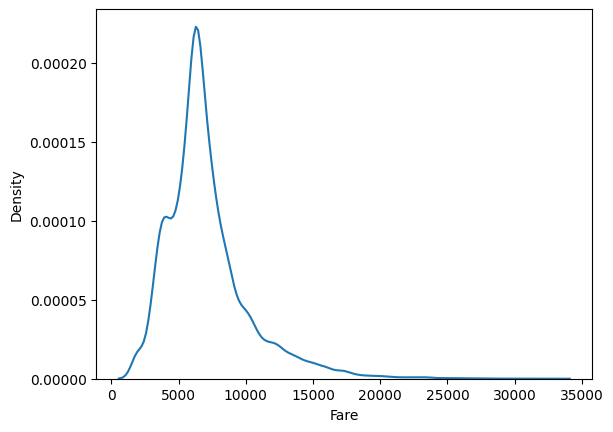

In [12]:
temp_df_price=price[price['Airline']=='AirAsia']['Fare']
sns.kdeplot(data=temp_df_price)
shapiro_test(temp_df_price)

**USING VARIOUS MACHINE LEARNING FOR PREDICTION**

**linear regression**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
l2=['A_DewPointC','A_WindGustKmph','A_cloudcover','A_humidity','A_precipMM','A_pressure','A_tempC','A_visibility','A_winddirDegree','A_windspeedKmph']
l1=['D_DewPointC','D_WindGustKmph','D_cloudcover','D_humidity','D_precipMM','D_pressure','D_tempC','D_visibility','D_winddirDegree','D_windspeedKmph']
# Create a linear regression model
model = LinearRegression()
x=np.array(dew_df['A_DewPointC'])
x=x.reshape((len(x), 1))
y=np.array(dew_df['Arrival Time Delay'])
y=y.reshape((len(y), 1))

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
# Fit the model to your data
model.fit(X=x,y=y)

# # Make predictions
y_pred = model.predict(X_test)
# print(y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the MAE
print(f'Mean Absolute Error: {mae}')



Mean Absolute Error: 8.754061578764745


**we wont consider logistic regression because it needs a binary input and the prediction too is made in binary format that is true or false**

**decision tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
model = DecisionTreeClassifier()

x=np.array(dew_df['A_DewPointC'])
x=x.reshape((len(x), 1))
y=np.array(dew_df['Arrival Time Delay'])
y=y.reshape((len(y), 1))

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
# Fit the model to your data
model.fit(X=X_train,y=y_train)

# # Make predictions
y_pred = model.predict(X_test)
# print(y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 11.054496823804747


**Random forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
model = RandomForestClassifier()

x=np.array(dew_df['A_DewPointC'])
x=x.reshape((len(x), 1))
y=np.array(dew_df['Arrival Time Delay'])
y=y.reshape((len(y), 1))

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
# Fit the model to your data
model.fit(X=X_train,y=y_train)

# # Make predictions
y_pred = model.predict(X_test)
# print(y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE
print(f'Mean Absolute Error: {mae}')

c:\Users\RUPAK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 10.821130056837179


**support vector machines**

In [38]:
from sklearn.svm import SVC

# Create an SVM classifier
model = SVC()

x=np.array(dew_df['A_DewPointC'])
x=x.reshape((len(x), 1))
y=np.array(dew_df['Arrival Time Delay'])
y=y.reshape((len(y), 1))

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
# Fit the model to your data
model.fit(X=X_train,y=y_train)

# # Make predictions
y_pred = model.predict(X_test)
# print(y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE
print(f'Mean Absolute Error: {mae}')

c:\Users\RUPAK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 12.188900033433635


**k nearest neighbour**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
model = KNeighborsClassifier()

x=np.array(dew_df['A_DewPointC'])
x=x.reshape((len(x), 1))
y=np.array(dew_df['Arrival Time Delay'])
y=y.reshape((len(y), 1))

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
# Fit the model to your data
model.fit(X=X_train,y=y_train)

# # Make predictions
y_pred = model.predict(X_test)
# print(y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 10.662654630558341


c:\Users\RUPAK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**GRADIENT BOOSTING **

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a gradient boosting classifier
model = GradientBoostingClassifier()

x=np.array(dew_df['A_DewPointC'])
x=x.reshape((len(x), 1))
y=np.array(dew_df['Arrival Time Delay'])
y=y.reshape((len(y), 1))

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
# Fit the model to your data
model.fit(X=X_train,y=y_train)

# # Make predictions
y_pred = model.predict(X_test)
# print(y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE
print(f'Mean Absolute Error: {mae}')

c:\Users\RUPAK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 10.965897693079238
